In [2]:
import numpy as np       # linear algrebra
import pandas as pd      # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day25-normalization/wine_data.csv"
df = pd.read_csv(url, header=None, usecols=[0, 1, 2])

In [4]:
df.head()

,0,1,2
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [5]:
df.columns=['Class Label', 'Alcohol', 'Malic acid']
df.head()

,Class Label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [6]:
df.shape

(178, 3)

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

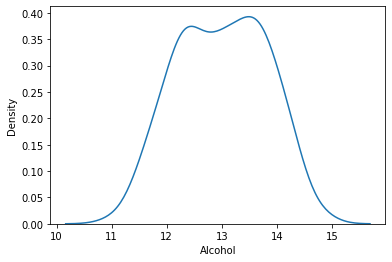

In [7]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

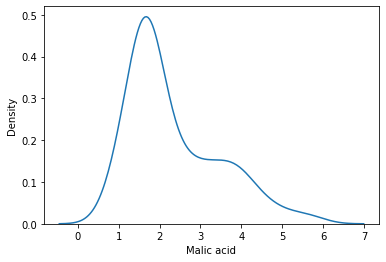

In [8]:
sns.kdeplot(df['Malic acid'])

c:\Users\uqba2\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

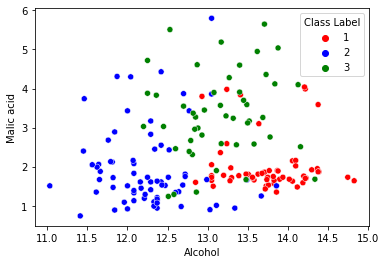

In [9]:
color_dict = {1:'red', 3:'green', 2:'blue'}
sns.scatterplot(df['Alcohol'], df['Malic acid'], hue=df['Class Label'], palette=color_dict)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df[['Class Label', 'Alcohol', 'Malic acid']]
y = df['Class Label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 0)
X_train.shape, X_test.shape                                                     

((124, 3), (54, 3))

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

# fit the Scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [17]:
np.round(X_train.describe(), 1)

,Class Label,Alcohol,Malic acid
count,124.0,124.0,124.0
mean,2.0,13.0,2.4
std,0.8,0.8,1.1
min,1.0,11.0,0.9
25%,1.0,12.4,1.6
50%,2.0,13.0,1.9
75%,3.0,13.6,3.2
max,3.0,14.8,5.6


In [18]:
np.round(X_train_scaled.describe(), 1)

,Class Label,Alcohol,Malic acid
count,124.0,124.0,124.0
mean,0.5,0.5,0.3
std,0.4,0.2,0.2
min,0.0,0.0,0.0
25%,0.0,0.4,0.2
50%,0.5,0.5,0.2
75%,1.0,0.7,0.5
max,1.0,1.0,1.0


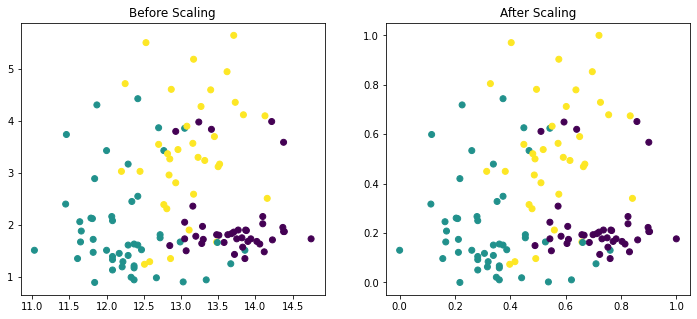

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'], c= y_train)
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], c=y_train)
ax2.set_title("After Scaling")

plt.show()

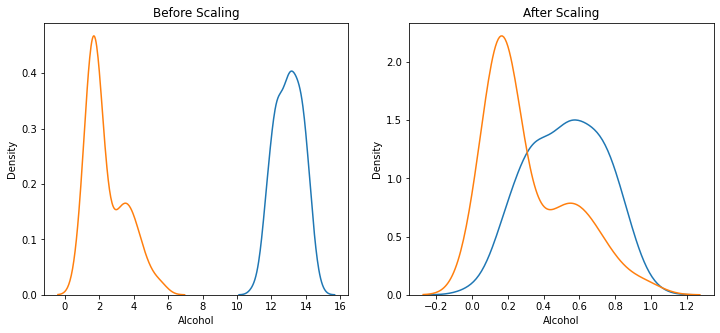

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))


# before scaling 
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax = ax1)

# after scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax = ax2)

plt.show()

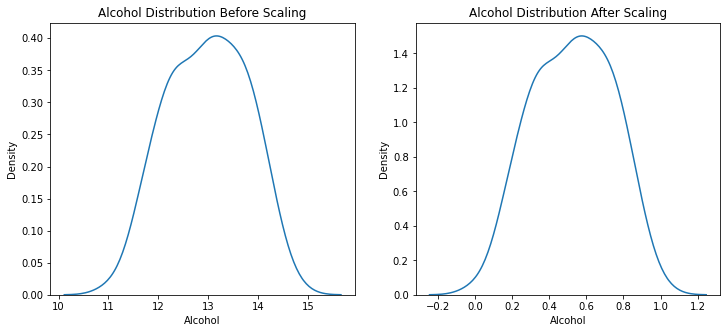

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))


# before scaling 
ax1.set_title("Alcohol Distribution Before Scaling")
sns.kdeplot(X_train['Alcohol'], ax=ax1)


# after scaling
ax2.set_title("Alcohol Distribution After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)


plt.show()

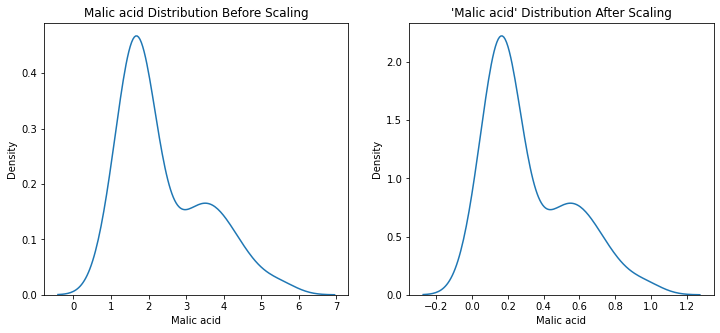

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))


# before scaling 
ax1.set_title("Malic acid Distribution Before Scaling")
sns.kdeplot(X_train['Malic acid'], ax=ax1)


# after scaling
ax2.set_title("'Malic acid' Distribution After Scaling")
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)


plt.show()